# Gaussian Process based Models

This section provides implementation for the concepts covered in the class for gaussian process based models, refer lecture for more details about the model. Below block imports required packages:

In [1]:
import numpy as np
from smt.surrogate_models import KRG
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Forrester function (given below) will be used for demonstration.

$$
y(x) = (6x - 2)^2sin(12x-4) \\
0 \leq x \leq 1
$$

Below block of code defines this function:

In [2]:
forrester = lambda x: (6*x-2)**2*np.sin(12*x-4)

Below block of code creates train dataset consists of 4 equally spaced points:

In [3]:
# Training data
xtrain = np.linspace(0, 1, 4)
ytrain = forrester(xtrain)

# Plotting data
xplot = np.linspace(0, 1, 100)
yplot = (6*xplot-2)**2 * np.sin(12*xplot-4)

Kriging model is created using `smt` package. A multistart gradient based optimization method is used for finding the optimal length scale for each dimension of the input space. Following are the important parameters while creating the model:

- `theta0` : Initial hyperparameters for the model
- `theta_bounds` : Bounds for hyperparameters
- `n_start` : Number of starting points for optimization
- `hyper_opt` : Optimization method for hyperparameters
- `corr` : correlation function

Please read [documentation](https://smt.readthedocs.io/en/latest/_src_docs/surrogate_models/krg.html) for more details. Below block of code creates the model using **radial basis (exponential)** kernel function and plots the prediction:

Optimal theta: [1.]


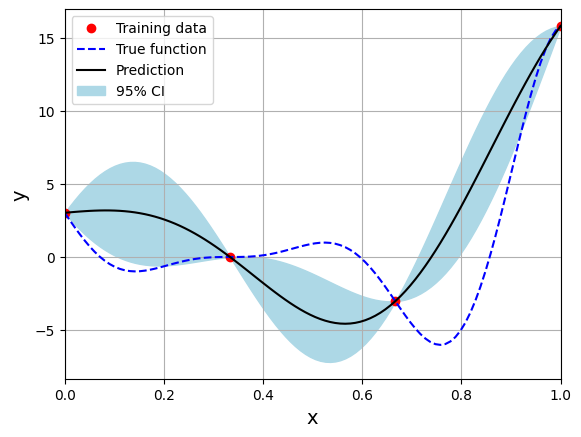

In [4]:
# Create model
corr = 'squar_exp'
sm = KRG(theta0=[1e-2], corr=corr, theta_bounds=[1e-6, 1], print_global=False)
sm.set_training_values(xtrain, ytrain)
sm.train()

print("Optimal theta: {}".format(sm.optimal_theta))

# Prediction for plotting
yplot_pred = sm.predict_values(xplot).reshape(-1,)
yplot_var = sm.predict_variances(xplot).reshape(-1,)

# Plotting
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, 'ro', label='Training data')
ax.plot(xplot, yplot, 'b--', label='True function')
ax.plot(xplot, yplot_pred, 'k', label='Prediction')
ax.fill_between(xplot, yplot_pred - 2*np.sqrt(yplot_var), yplot_pred + 2*np.sqrt(yplot_var), color='lightblue', label='95% CI')
ax.set_xlim([0, 1])
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
ax.legend()
ax.grid()

Few important points to note:
- Kriging is an interpolating model as it passes through the training points.
- Model provides a mean prediction and an uncertainty estimate in the prediction.
- Optimal theta is at the upper bound of the range. You can change the range and see how it affects the performance of the model.

Below block of code creates the model using **Matern 32** kernel function:

Optimal theta: [1.]


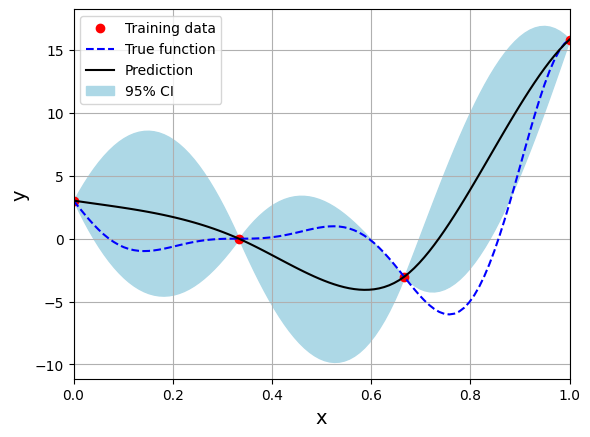

In [5]:
# Create model
corr = 'matern32'
sm = KRG(theta0=[1e-2], corr=corr, theta_bounds=[1e-6, 1], print_global=False)
sm.set_training_values(xtrain, ytrain)
sm.train()

print("Optimal theta: {}".format(sm.optimal_theta))

# Prediction for plotting
yplot_pred = sm.predict_values(xplot).reshape(-1,)
yplot_var = sm.predict_variances(xplot).reshape(-1,)

# Plotting
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, 'ro', label='Training data')
ax.plot(xplot, yplot, 'b--', label='True function')
ax.plot(xplot, yplot_pred, 'k', label='Prediction')
ax.fill_between(xplot, yplot_pred - 2*np.sqrt(yplot_var), yplot_pred + 2*np.sqrt(yplot_var), color='lightblue', label='95% CI')
ax.set_xlim([0, 1])
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
ax.legend()
ax.grid()

Below block of code creates the model using **Matern 52** kernel function:

Optimal theta: [1.]


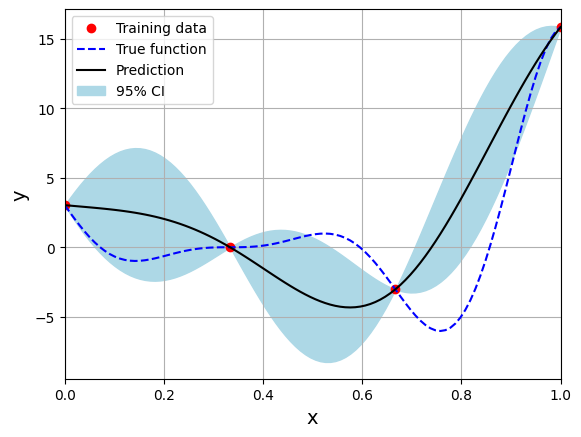

In [6]:
# Create model
corr = 'matern52'
sm = KRG(theta0=[1e-2], corr=corr, theta_bounds=[1e-6, 1], print_global=False)
sm.set_training_values(xtrain, ytrain)
sm.train()

print("Optimal theta: {}".format(sm.optimal_theta))

# Prediction for plotting
yplot_pred = sm.predict_values(xplot).reshape(-1,)
yplot_var = sm.predict_variances(xplot).reshape(-1,)

# Plotting
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, 'ro', label='Training data')
ax.plot(xplot, yplot, 'b--', label='True function')
ax.plot(xplot, yplot_pred, 'k', label='Prediction')
ax.fill_between(xplot, yplot_pred - 2*np.sqrt(yplot_var), yplot_pred + 2*np.sqrt(yplot_var), color='lightblue', label='95% CI')
ax.set_xlim([0, 1])
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
ax.legend()
ax.grid()

Note that mean prediction and uncertainty estimates are different for different kernel functions and you need to experiment with different kernel functions to find the best model for your problem. Now, number of samples will be increased to see when model prediction is good. This method is also known as **one-shot sampling**. More efficient way to obtain good fit is to use sequential sampling which will be discussed in future sections. Below block of code fits Kriging model on different sample sizes, plots the fit, and computes normalized rmse on plotting data.

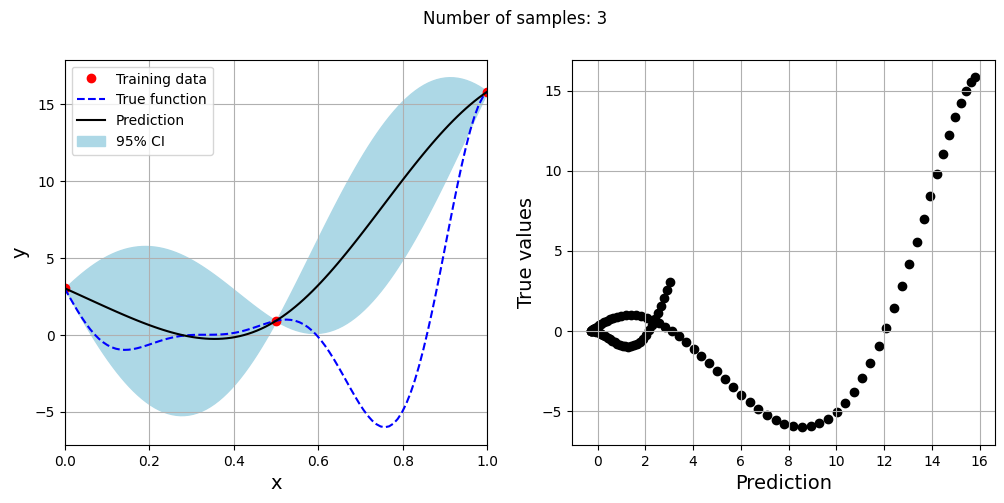

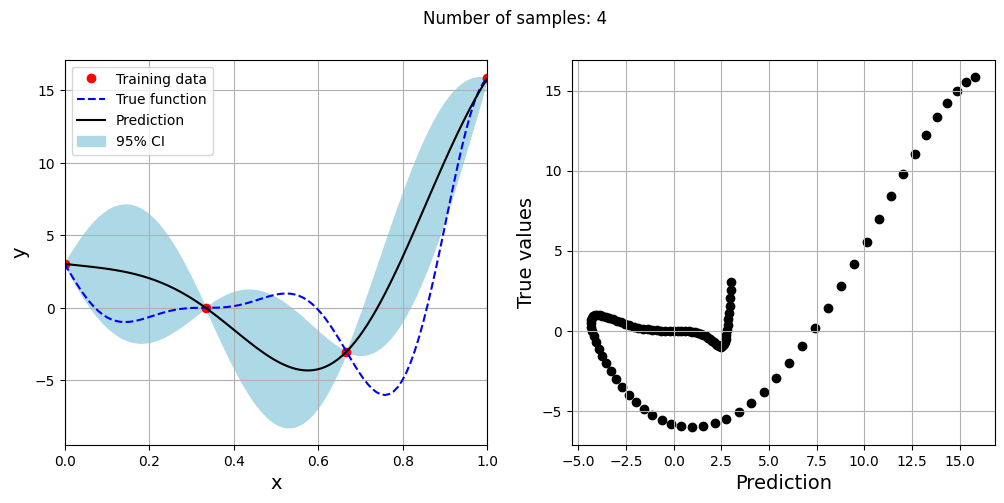

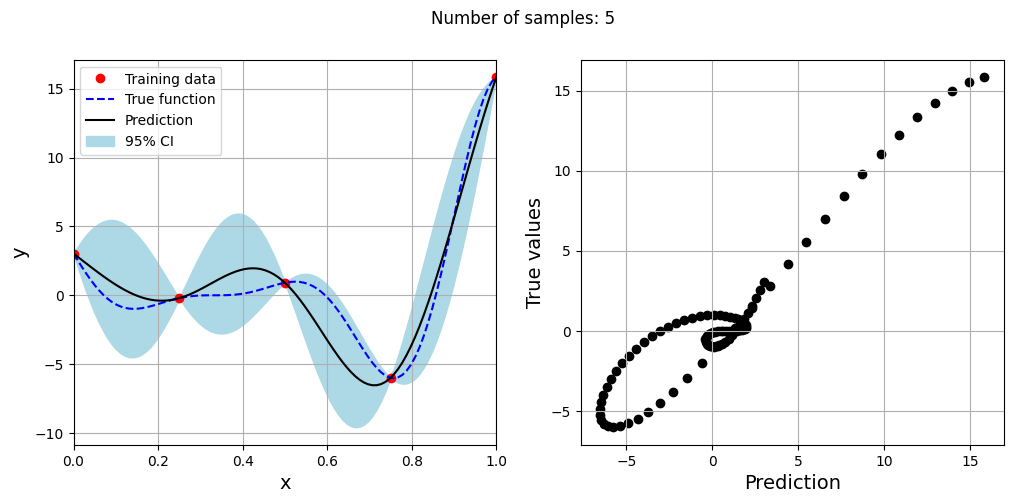

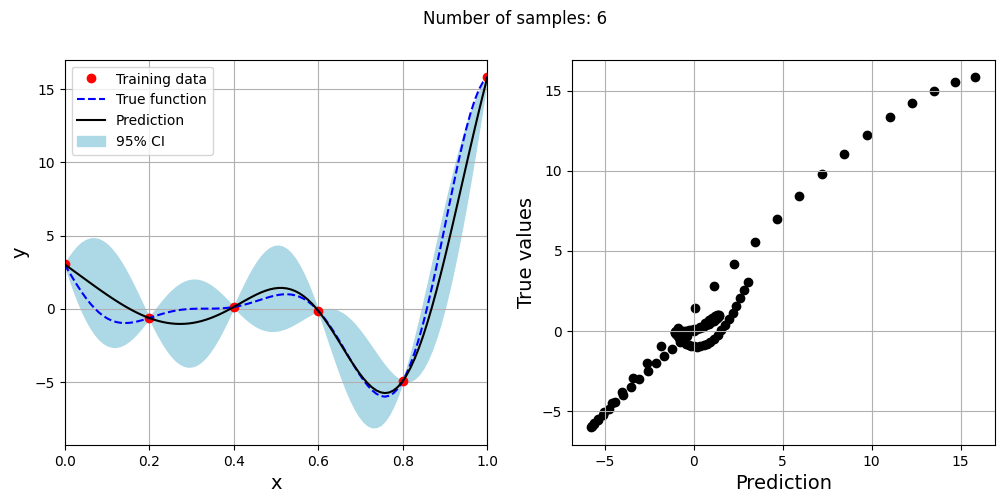

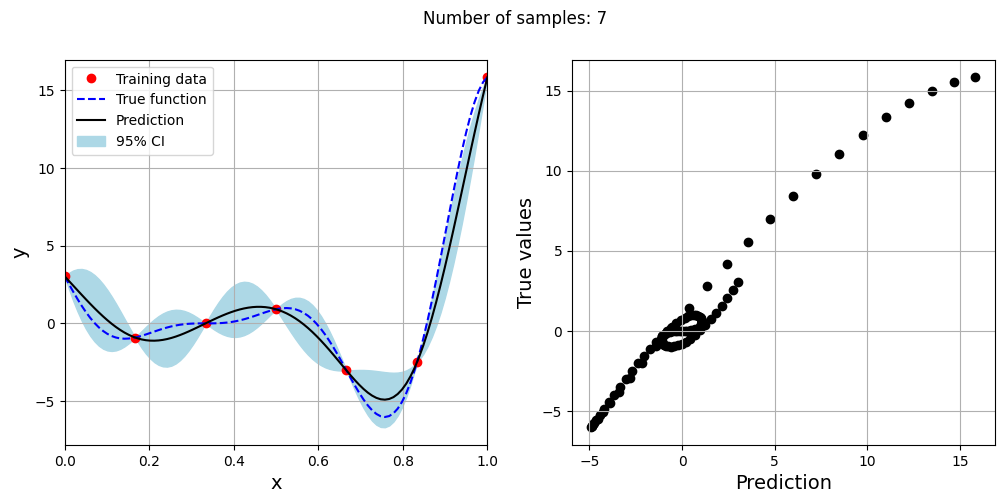

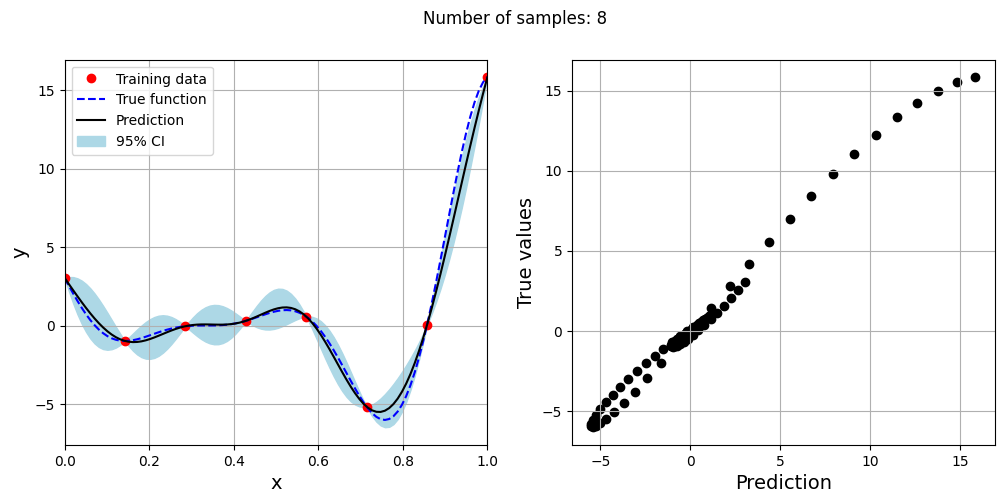

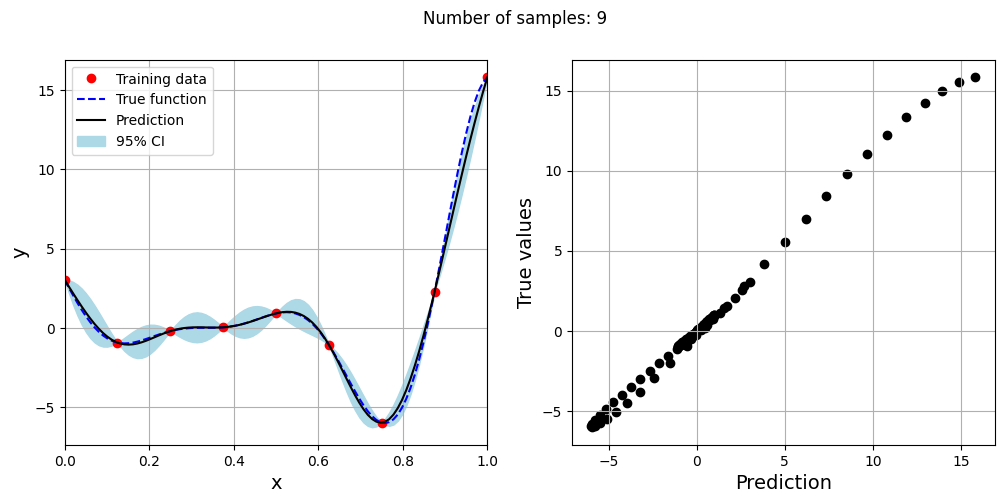

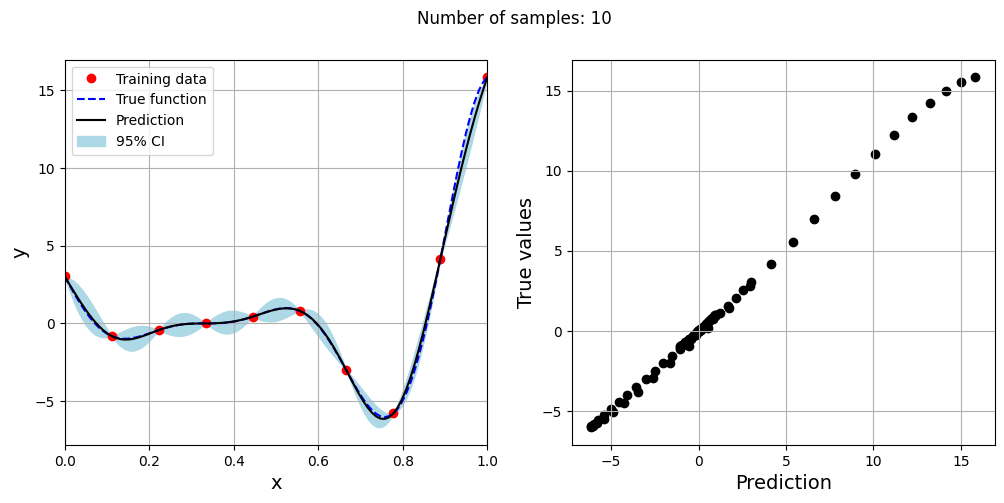

In [8]:
# Creating array of training sample sizes
samples = np.array([3, 4, 5, 6, 7, 8, 9, 10])

# Initializing nrmse list
nrmse = []

# Fitting with different sample size
for sample in samples:
    
    xtrain = np.linspace(0, 1, sample)
    ytrain = forrester(xtrain)
    
    # Fitting the kriging
    sm = KRG(theta0=[1e-2], corr='matern52', theta_bounds=[1e-6, 1], print_global=False)
    sm.set_training_values(xtrain, ytrain)
    sm.train()
    
    # Predict at test values
    yplot_pred = sm.predict_values(xplot).reshape(-1,)
    yplot_var = sm.predict_variances(xplot).reshape(-1,)

    # Calculating average nrmse
    nrmse.append( np.sqrt(mean_squared_error(yplot, yplot_pred)) / np.ptp(yplot) )
    
    # Plotting prediction
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    
    ax[0].plot(xtrain, ytrain, 'ro', label='Training data')
    ax[0].plot(xplot, yplot, 'b--', label='True function')
    ax[0].plot(xplot, yplot_pred, 'k', label='Prediction')
    ax[0].fill_between(xplot, yplot_pred - 2*np.sqrt(yplot_var), yplot_pred + 2*np.sqrt(yplot_var), color='lightblue', label='95% CI')
    ax[0].set_xlim((0, 1))
    ax[0].set_xlabel("x", fontsize=14)
    ax[0].set_ylabel("y", fontsize=14)
    ax[0].grid()
    ax[0].legend()
    
    ax[1].scatter(yplot_pred, yplot, c="k")
    ax[1].set_xlabel("Prediction", fontsize=14)
    ax[1].set_ylabel("True values", fontsize=14)
    ax[1].grid()
    
    fig.suptitle("Number of samples: {}".format(sample))

As the number of samples increase, the model prediction becomes better. Also, the value of length scale will change with number of samples. So, it is important to change the refit when model for different data. Below block of code plots the normalized rmse (computed using plotting data) as a function of number of samples. The nrmse decreases as the number of samples increase since prediction improves.

Text(0, 0.5, 'Normalized RMSE')

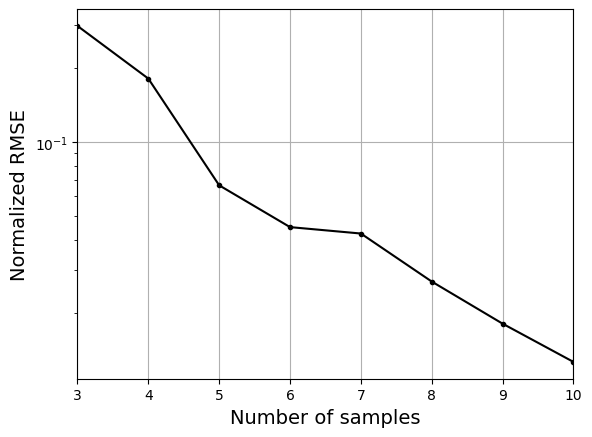

In [9]:
# Plotting NMRSE
fig, ax = plt.subplots()
ax.plot(samples, np.array(nrmse), c="k", marker=".")
ax.grid()
ax.set_yscale("log")
ax.set_xlim((samples[0], samples[-1]))
ax.set_xlabel("Number of samples", fontsize=14)
ax.set_ylabel("Normalized RMSE", fontsize=14)